# Now we have our data in FASTQ format, we should now analyze the quality using FASTQC

In [1]:
MIAMIID = !echo $USER
MIAMIID = str(MIAMIID)
MIAMIID = MIAMIID[2:len(MIAMIID)-2]
print(MIAMIID)

schroe51


In [2]:
%env PATH

'/home/schroe51/.local/bin:/software/python/anaconda3/condabin:/software/python/anaconda3/bin:/usr/local/bin:/usr/local/sbin:/opt/moab/bin:/usr/local/bin:/usr/local/sbin:/opt/moab/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/bin:/usr/bin:/usr/X11R6/bin:/opt/puppetlabs/bin'

In [5]:
%cd /home/{MIAMIID}/test/raw_data/fastq/
!ls

/home/schroe51/test/raw_data/fastq
getFastqData.sh      SRR5017133.fastq.gz  SRR5017138.fastq.gz
SRR5017128.fastq.gz  SRR5017135.fastq.gz
SRR5017132.fastq.gz  SRR5017137.fastq.gz


# Important:

We now need to install fastqc using the following commands in the terminal:

## sudo apt-get update
## sudo apt-get -y install fastqc

# IF ON REDHAWK USE THESE INSTRUCTIONS:


In [9]:
%cd /home/{MIAMIID}/software
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip

/home/schroe51/software
--2022-11-15 13:21:18--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  2.09MB/s    in 4.7s    

2022-11-15 13:21:23 (2.09 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]



In [10]:
!unzip fastqc_v0.11.9.zip
!rm fastqc_v0.11.9.zip

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/contaminant_list.txt  
  inflating: FastQC/Configuration/limits.txt  
  inflating: FastQC/fastqc           
  inflating: FastQC/fastqc_icon.ico  
   creating: FastQC/Help/
   creating: FastQC/Help/1 Introduction/
   creating: FastQC/Help/1 Introduction/.svn/
  inflating: FastQC/Help/1 Introduction/.svn/entries  
   creating: FastQC/Help/1 Introduction/.svn/props/
   creating: FastQC/Help/1 Introduction/.svn/text-base/
  inflating: FastQC/Help/1 Introduction/.svn/text-base/1.1 What is FastQC.html.svn-base  
   creating: FastQC/Help/1 Introduction/.svn/tmp/
   creating: FastQC/Help/1 Introduction/.svn/tmp/props/
  inflating: FastQC/Help/1 Introduction/1.1 What is FastQC.html  
   creating: FastQC/Help/2 Basic Operations/
   creating: FastQC/Help/2 Basic Operations/.svn/
  inflating: FastQC/Help/2 Basic

  inflating: FastQC/org/apache/commons/math3/analysis/solvers/BracketedUnivariateSolver.class  
  inflating: FastQC/org/apache/commons/math3/analysis/solvers/BrentSolver.class  
  inflating: FastQC/org/apache/commons/math3/analysis/solvers/UnivariateSolver.class  
  inflating: FastQC/org/apache/commons/math3/analysis/solvers/UnivariateSolverUtils.class  
  inflating: FastQC/org/apache/commons/math3/analysis/UnivariateFunction.class  
   creating: FastQC/org/apache/commons/math3/distribution/
  inflating: FastQC/org/apache/commons/math3/distribution/AbstractIntegerDistribution.class  
  inflating: FastQC/org/apache/commons/math3/distribution/AbstractRealDistribution$1.class  
  inflating: FastQC/org/apache/commons/math3/distribution/AbstractRealDistribution.class  
  inflating: FastQC/org/apache/commons/math3/distribution/BetaDistribution.class  
  inflating: FastQC/org/apache/commons/math3/distribution/BinomialDistribution.class  
  inflating: FastQC/org/apache/commons/math3/distributi

   creating: FastQC/uk/ac/babraham/FastQC/Modules/
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/AbstractQCModule.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/AdapterContent$Adapter.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/AdapterContent$ResultsTable.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/AdapterContent.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/BasicStats$ResultsTable.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/BasicStats.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/DuplicationLevel.class  
   creating: FastQC/uk/ac/babraham/FastQC/Modules/GCModel/
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/GCModel/GCModel.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/GCModel/GCModelValue.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/KmerContent$Kmer.class  
  inflating: FastQC/uk/ac/babraham/FastQC/Modules/KmerContent$ResultsTable.class  
  inflating: FastQC/uk/ac/babraham/Fas

In [11]:
!chmod 755 FastQC/fastqc

In [3]:
curPath = %env PATH
pathWithFastQC = "/home/" + MIAMIID + "/software/FastQC/:" + curPath
print(pathWithFastQC)

/home/schroe51/software/FastQC/:/home/schroe51/.local/bin:/software/python/anaconda3/condabin:/software/python/anaconda3/bin:/usr/local/bin:/usr/local/sbin:/opt/moab/bin:/usr/local/bin:/usr/local/sbin:/opt/moab/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/bin:/usr/bin:/usr/X11R6/bin:/opt/puppetlabs/bin


In [4]:
import os
os.environ['PATH'] = pathWithFastQC

In [5]:
%env PATH

'/home/schroe51/software/FastQC/:/home/schroe51/.local/bin:/software/python/anaconda3/condabin:/software/python/anaconda3/bin:/usr/local/bin:/usr/local/sbin:/opt/moab/bin:/usr/local/bin:/usr/local/sbin:/opt/moab/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/bin:/usr/bin:/usr/X11R6/bin:/opt/puppetlabs/bin'

# Let us now use fastqc to analyze a fastq file, we will be using SRR5017135 since it is the smallest in size.

In [15]:
%cd /home/{MIAMIID}/test/raw_data/fastq/
!ls

/home/schroe51/test/raw_data/fastq
getFastqData.sh      SRR5017133.fastq.gz  SRR5017138.fastq.gz
SRR5017128.fastq.gz  SRR5017135.fastq.gz
SRR5017132.fastq.gz  SRR5017137.fastq.gz


In [16]:
!fastqc SRR5017135.fastq.gz

Started analysis of SRR5017135.fastq.gz
Approx 5% complete for SRR5017135.fastq.gz
Approx 10% complete for SRR5017135.fastq.gz
Approx 15% complete for SRR5017135.fastq.gz
Approx 20% complete for SRR5017135.fastq.gz
Approx 25% complete for SRR5017135.fastq.gz
Approx 30% complete for SRR5017135.fastq.gz
Approx 35% complete for SRR5017135.fastq.gz
Approx 40% complete for SRR5017135.fastq.gz
Approx 45% complete for SRR5017135.fastq.gz
Approx 50% complete for SRR5017135.fastq.gz
Approx 55% complete for SRR5017135.fastq.gz
Approx 60% complete for SRR5017135.fastq.gz
Approx 65% complete for SRR5017135.fastq.gz
Approx 70% complete for SRR5017135.fastq.gz
Approx 75% complete for SRR5017135.fastq.gz
Approx 80% complete for SRR5017135.fastq.gz
Approx 85% complete for SRR5017135.fastq.gz
Approx 90% complete for SRR5017135.fastq.gz
Approx 95% complete for SRR5017135.fastq.gz
Analysis complete for SRR5017135.fastq.gz


Now we have the output in the form of one html file (a web page) and one zip file containing images and reports.

In [17]:
!ls *.html && ls *.zip

SRR5017135_fastqc.html
SRR5017135_fastqc.zip


Now we should store these files in their own folder

In [18]:
%mkdir -p /home/{MIAMIID}/test/fastqc_untrimmed
%mv *.zip /home/{MIAMIID}/test/fastqc_untrimmed
%mv *.html /home/{MIAMIID}/test/fastqc_untrimmed

In [19]:
!ls /home/{MIAMIID}/test/fastqc_untrimmed

SRR5017135_fastqc.html	SRR5017135_fastqc.zip


# You can now go to your home jupyter notebook page and open the html file in the "fastqc_untrimmed" folder to see the results of the quality report 

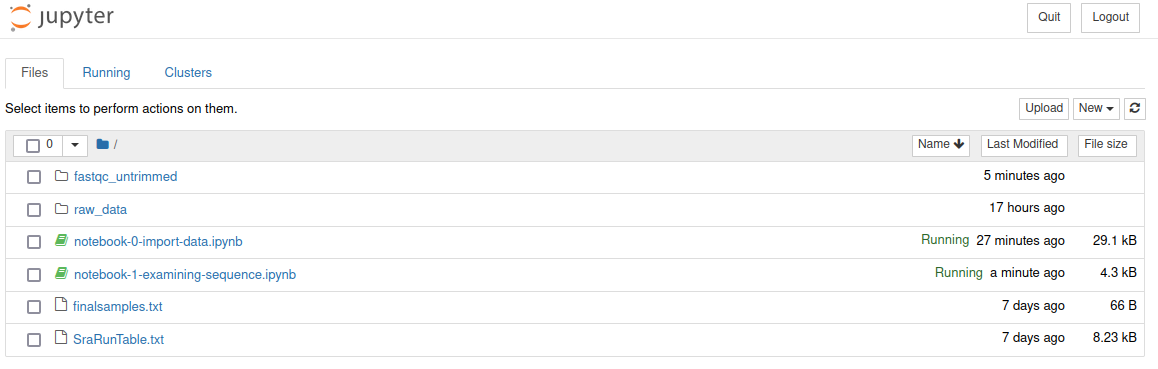
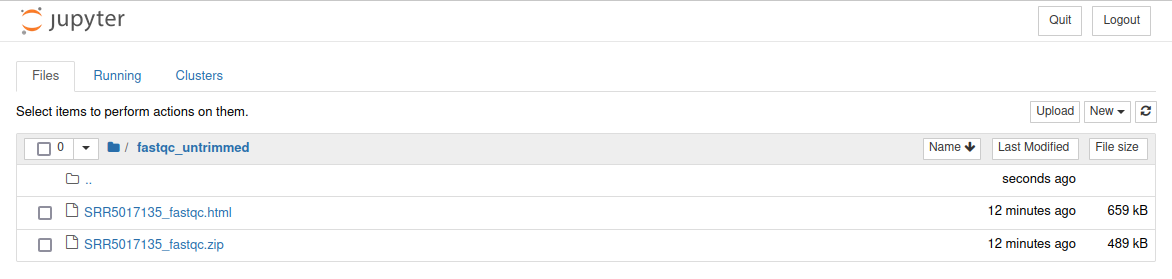

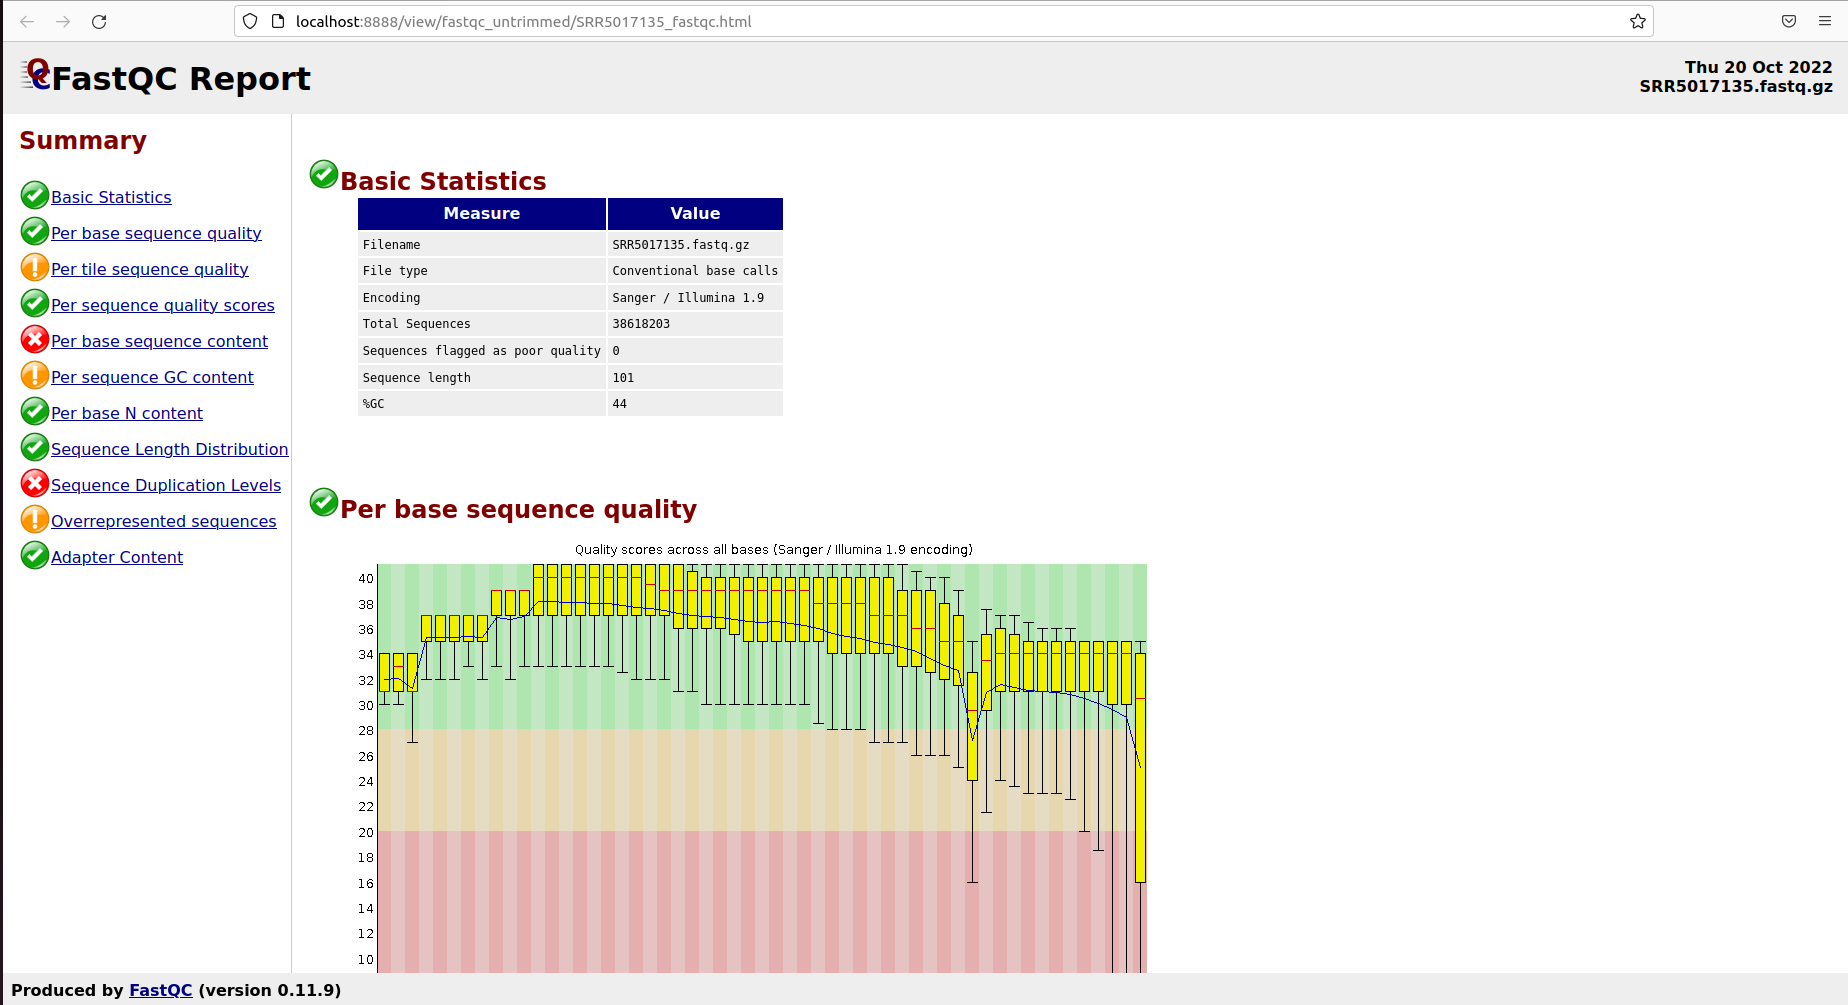